In [36]:
import matplotlib.pyplot as plt
import numpy as np
import time

import qiskit
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer
import qiskit as qiskit
import qiskit.quantum_info as qi
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
# Loading your IBM Quantum account(s)
IBMQ.save_account(
    '280beccbee94456a161a6cbc217e1366bc278bf60e22bd30281fa0ca5bec6e50897278ef818f3c53f6700e04b9ed32ea364195044413b7e02836a79d886b03d9',
    overwrite=True)
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q-research')

ibmqfactory.load_account:WARNING:2023-05-06 00:52:37,430: Credentials are already in use. The existing account in the session will be replaced.


In [37]:
h = lambda n, J, z: sum([J[i] * (z[i] - 1) * (z[i + 1] - 1) for i in range(n - 1)])
def effective_hem(size, J):
    hem = np.zeros((2**size, 2**size))
    for i in range(2**size):
        binary = '{0:b}'.format(i).zfill(size)
        Z = [(-1)**int(i) for i in binary]
        hem[i,i] = h(size, J, Z)
    return hem
#print(effective_hem(4,[1,1,1]))

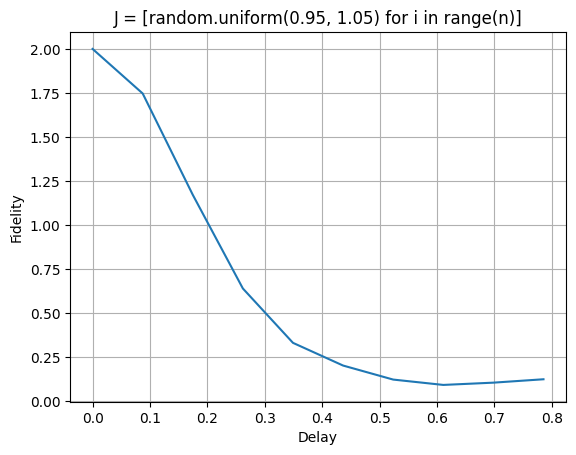

In [38]:
from scipy.linalg import expm
import random
res = []
delay = np.linspace(0,(1/4)*np.pi,10)

fid = []
n = 5
J = [random.uniform(0.90, 1.1) for _ in range(n-1)]
#J = [1.0818719219848087, 0.9534243710504171]
for t in delay:
    #qr = QuantumRegister(n)
    #cr = ClassicalRegister(n)
    qc = QuantumCircuit(n)
    for i in range(n):
        qc.h(i)

    U = expm((-1j*t)*effective_hem(n,J))
    U = qi.Operator(U)

    qc.unitary(U, [i for i in range(n)])

    for i in range(n):
        qc.h(i)
    qc.measure_all()
    #qc.measure(qr[1],cr[1])

    #Simulator
    qcomp = Aer.get_backend("qasm_simulator")
    result = qiskit.execute(qc, Aer.get_backend('qasm_simulator'), shots=16000).result()
    fid.append(result.get_counts().get('0'*n,0)/8000)
    res.append(result.get_counts())




plt.grid()
plt.ylabel('Fidelity')
plt.xlabel('Delay')
plt.title('J = [random.uniform(0.95, 1.05) for i in range(n)]')
plt.plot(delay,fid)

[0.969429344318032, 0.9702579021049185, 1.0252986847439909, 1.020264227834179]
0.5235987755982988


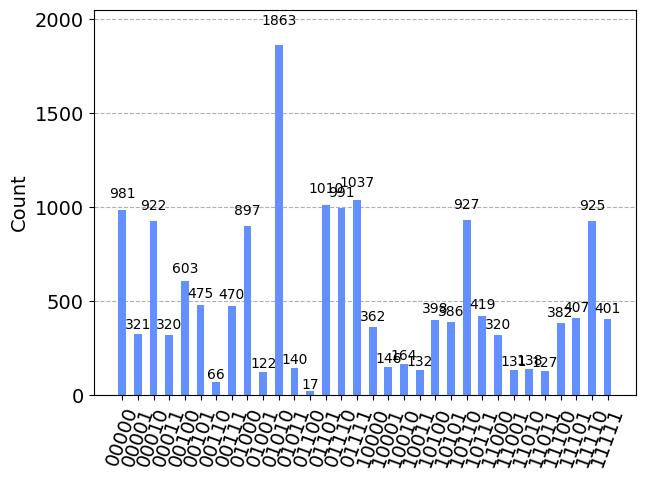

In [39]:
#Plots qiskit histogram:
print(J)
print(delay[6])
t= delay[6]
from qiskit.visualization import plot_histogram
plot_histogram(res[6])


In [40]:
from imp import reload
import CalculateCrossTalk
reload(CalculateCrossTalk)
print(CalculateCrossTalk.one_dim(t,res[6], n))

7571.971181783429
[0.97141472 0.97478733 1.01929401 1.01560413]


In [42]:
j0 = [0]*(n-1)
for r in range(len(res)):
    j = CalculateCrossTalk.one_dim(delay[r],res[r], n)*(1/(len(res)))
    j0 = j0 + j
print(j0)

5.29395592033938e-23
919.4535135829063
2689.631719474128
5700.6911851782
14474.279256158847
10444.302658724508
7571.971181783429
12933.362324567364
20799.027041366015
12758.000000000284
[0.97071087 0.97906243 1.0144384  1.02422072]
